In [2]:
%matplotlib inline
import torch
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')


In [66]:
df = pd.read_csv('training_results_n.csv')
loss = df['Loss']
dice_score = df['Metric']

for idx, v in enumerate(dice_score):
    #check if its nan
    if np.isnan(v):
        #take the next value
        dice_score[idx] = dice_score[idx+1]

/var/folders/v_/2tjf1ndd5j1d6fdzf5y_6qlw0000gn/T/ipykernel_11572/2852288736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dice_score[idx] = dice_score[idx+1]
/var/folders/v_/2tjf1ndd5j1d6fdzf5y_6qlw0000gn/T/ipykernel_11572/2852288736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dice_score[idx] = dice_score[idx+1]
/var/folders/v_/2tjf1ndd5j1d6fdzf5y_6qlw0000gn/T/ipykernel_11572/2852288736.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view

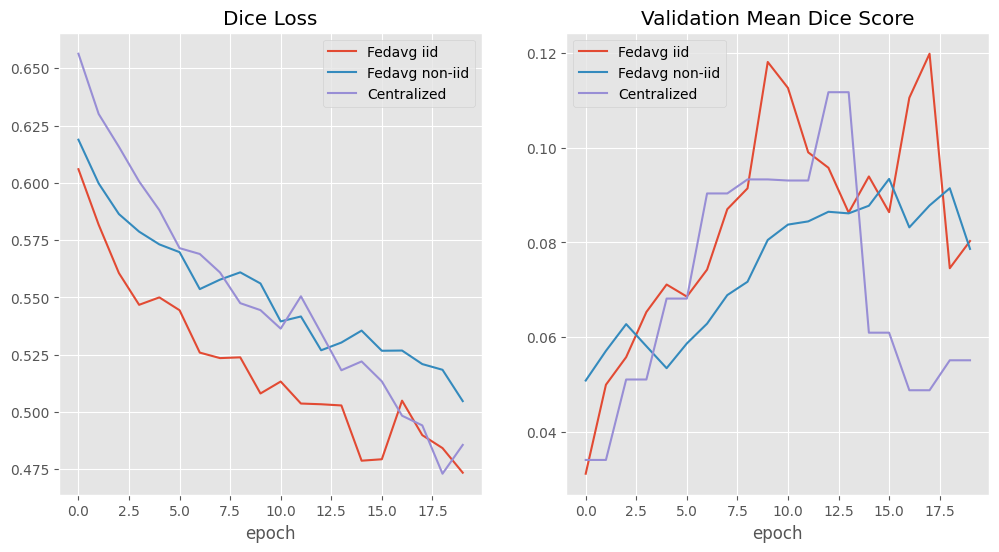

In [67]:
plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Dice Loss")
plt.xlabel("epoch")
plt.plot(log_fedavg_r20_iid["round_losses"], label="Fedavg iid")
plt.plot(log_fedavg_r20_niid["round_losses"], label="Fedavg non-iid")
plt.plot(loss, label="Centralized")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Validation Mean Dice Score")
plt.xlabel("epoch")
plt.plot(log_fedavg_r20_iid["dice_scores"], label="Fedavg iid")
plt.plot(log_fedavg_r20_niid["dice_scores"], label="Fedavg non-iid")
plt.plot(dice_score, label="Centralized")
plt.legend()

In [ ]:
import os
root_dir = os.path.dirname(os.path.dirname(os.path.abspath("federated_learning")))
data_dir = os.path.join(root_dir, "data/raw/Task09_Spleen/")
model_dir = os.path.join(root_dir, "models_i5")

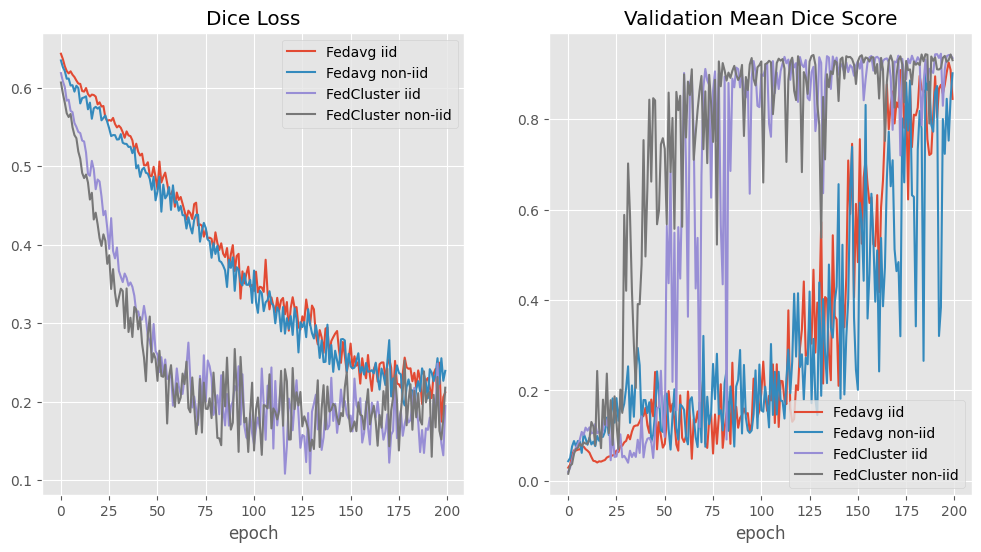

In [3]:
# plot loss and dice score from a pth fil
log_fedavg_r200_iid = torch.load(os.path.join(model_dir, 'fedavg_r200_iid.pth'))
log_fedavg_r200_niid = torch.load(os.path.join(model_dir, 'fedavg_r200_niid.pth'))
log_fedc_r200_iid = torch.load(os.path.join(model_dir, 'fedc_r200_iid.pth'))
log_fedc_r200_niid = torch.load(os.path.join(model_dir, 'fedc_r200_niid.pth'))

plt.figure("train", (12, 6))
plt.subplot(1, 2, 1)
plt.title("Dice Loss")
plt.xlabel("epoch")
plt.plot(log_fedavg_r200_iid["round_losses"], label="Fedavg iid")
plt.plot(log_fedavg_r200_niid["round_losses"], label="Fedavg non-iid")
plt.plot(log_fedc_r200_iid["round_losses"], label="FedCluster iid")
plt.plot(log_fedc_r200_niid["round_losses"], label="FedCluster non-iid")
plt.legend()
plt.subplot(1, 2, 2)
plt.title("Validation Mean Dice Score")
plt.xlabel("epoch")
plt.plot(log_fedavg_r200_iid["dice_scores"], label="Fedavg iid")
plt.plot(log_fedavg_r200_niid["dice_scores"], label="Fedavg non-iid")
plt.plot(log_fedc_r200_iid["dice_scores"], label="FedCluster iid")
plt.plot(log_fedc_r200_niid["dice_scores"], label="FedCluster non-iid")
plt.legend()